# Credal Networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,posix [darwin]
Python,"3.13.0 (main, Oct 7 2024, 05:02:14) [Clang 16.0.0 (clang-1600.0.26.3)]"
IPython,8.28.0
Matplotlib,3.9.2
Numpy,2.1.2
pyDot,3.0.2
pyAgrum,1.17.0


## Credal Net from BN

In [3]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.flow.row(bn,bn.cpt("B"),cn,bn_min.cpt("B"),bn_max.cpt("B"),captions=["Bayes Net","CPT","Credal Net","CPTmin","CPTmax"])


#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [4]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.flow.row(cn,cn2,captions=["Credal net","Binarized credal net"])

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [5]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [6]:
gnb.sideBySide(gnb.getInference(cn,engine=ie_mc),
               gnb.getInference(cn2,engine=ie2_mc),
               gnb.getInference(cn2,engine=ie2_lbp))

In [7]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"),
               ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"),
              ncols=3)
print(cn)


A:Range([0,1])
<> : [[0.741282 , 0.258718] , [0.889121 , 0.110879]]

B:Range([0,2])
<A:0> : [[0.574423 , 0.239256 , 0.186321] , [0.574423 , 0.273893 , 0.151684] , [0.609062 , 0.273893 , 0.117045] , [0.643699 , 0.239256 , 0.117045] , [0.609062 , 0.204617 , 0.186321] , [0.643699 , 0.204617 , 0.151684]]
<A:1> : [[0.338922 , 0.539847 , 0.121231] , [0.338922 , 0.574485 , 0.0865929] , [0.373558 , 0.574485 , 0.0519568] , [0.408197 , 0.539846 , 0.0519568] , [0.373558 , 0.505211 , 0.121231] , [0.408197 , 0.505211 , 0.0865926]]

C:Range([0,1])
<B:0|D:0> : [[0.249053 , 0.750947] , [0.550385 , 0.449615]]
<B:1|D:0> : [[0.303443 , 0.696557] , [0.604776 , 0.395224]]
<B:2|D:0> : [[0.300857 , 0.699143] , [0.60219 , 0.39781]]
<B:0|D:1> : [[0.430766 , 0.569234] , [0.732099 , 0.267901]]
<B:1|D:1> : [[0.226 , 0.774] , [0.527331 , 0.472669]]
<B:2|D:1> : [[0.30202 , 0.69798] , [0.603352 , 0.396648]]

D:Range([0,1])
<A:0> : [[0.0127532 , 0.987247] , [0.0297572 , 0.970243]]
<A:1> : [[0.426112 , 0.573888] , [0

## Credal Net from bif files

In [8]:
cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

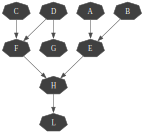

In [9]:
gnb.showCN(cn,"2")

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [11]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [12]:
cn

(pyAgrum.CredalNet<double>@0x124952e00) 
A:Labelized({0|1})
<> : [[0.6 , 0.4] , [0.7 , 0.3]]

B:Labelized({0|1})
<> : [[0.6 , 0.4] , [0.8 , 0.2]]

C:Labelized({0|1})
<> : [[0 , 1] , [0.1 , 0.9]]

D:Labelized({0|1})
<> : [[0.1 , 0.9] , [0.5 , 0.5]]

E:Labelized({0|1})
<A:0|B:0> : [[0.3 , 0.7] , [0.4 , 0.6]]
<A:1|B:0> : [[0.8 , 0.2] , [1 , 0]]
<A:0|B:1> : [[0.7 , 0.3] , [0.9 , 0.1]]
<A:1|B:1> : [[0.5 , 0.5] , [0.7 , 0.3]]

F:Labelized({0|1})
<C:0|D:0> : [[0.1 , 0.9] , [0.2 , 0.8]]
<C:1|D:0> : [[0.5 , 0.5]]
<C:0|D:1> : [[0.3 , 0.7] , [0.5 , 0.5]]
<C:1|D:1> : [[0.6 , 0.4] , [0.9 , 0.1]]

G:Labelized({0|1})
<D:0> : [[0.6 , 0.4] , [0.8 , 0.2]]
<D:1> : [[0.2 , 0.8] , [0.3 , 0.7]]

H:Labelized({0|1})
<E:0|F:0> : [[0 , 1] , [0.1 , 0.9]]
<E:1|F:0> : [[0.6 , 0.4] , [0.8 , 0.2]]
<E:0|F:1> : [[0.2 , 0.8] , [0.4 , 0.6]]
<E:1|F:1> : [[0.8 , 0.2] , [0.9 , 0.1]]

L:Labelized({0|1})
<H:0> : [[0.8 , 0.2] , [1 , 0]]
<H:1> : [[0.5 , 0.5] , [0.6 , 0.4]]

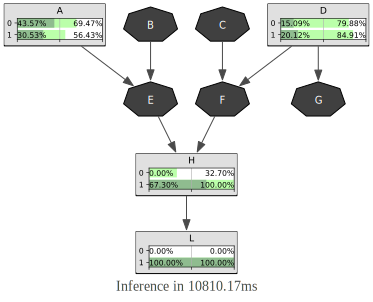

In [13]:
gnb.showInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]})

## Comparing inference in credal networks

In [14]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

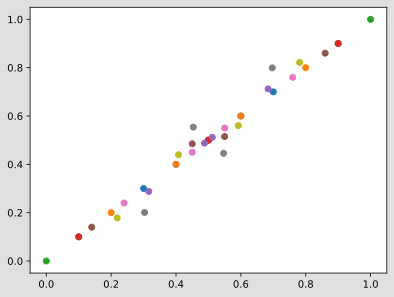

In [15]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

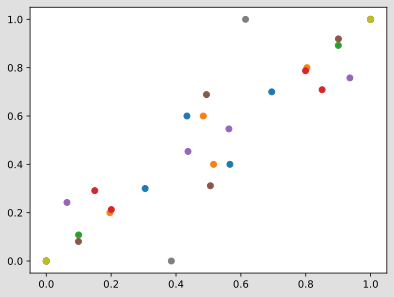

In [16]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [25]:
cn=gum.CredalNet("res/cn/bn_c_8.bif","res/cn/den_c_8.bif")
cn.bnToCredal(0.8,False)

In [18]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(5)
ie.setMaxIter(1000)

ie.makeInference()

In [19]:
print(ie.dynamicExpMax("temp"))

(14.20340464752247, 11.718137408680768, 12.10019505553209, 11.961533642299521, 11.965402073729585, 11.964973878078364, 11.965019991998947, 11.96501512083492, 11.96501567303239)


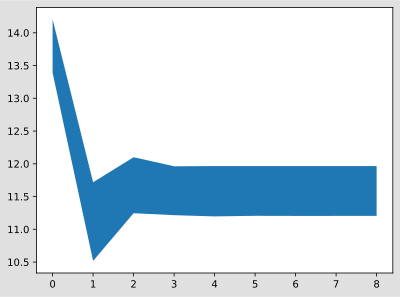

In [20]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))
plt.show()

In [21]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(5)
ie.setMaxIter(1000)

ie.makeInference()
print(ie.messageApproximationScheme())

stopped with epsilon=0


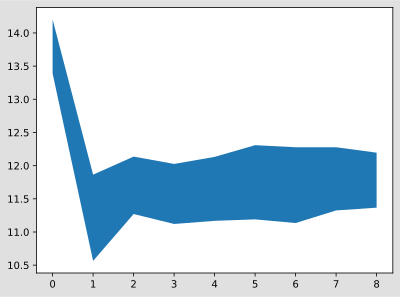

In [22]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))
plt.show()

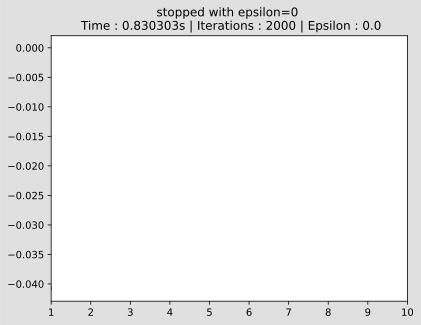

In [23]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(5)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()

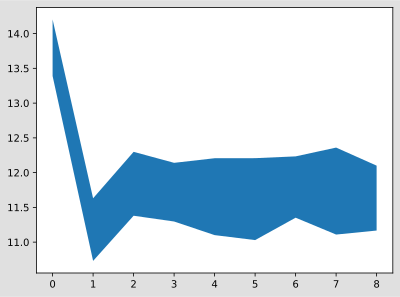

In [24]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));
plt.show()